In [14]:
import os
import numpy as np
import pandas as pd

df = pd.read_csv("sequences.csv")
df


/tmp/ipykernel_1250646/2421780450.py:5: DtypeWarning: Columns (3,4,8,13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("sequences.csv")


,Accession,Organism_Name,GenBank_RefSeq,Assembly,Submitters,Organization,Org_location,Release_Date,Isolate,Species,Length,Nuc_Completeness,Geo_Location,USA,Host,Tissue_Specimen_Source,Collection_Date
0,NC_077837.1,Mammalian orthoreovirus 3 Dearing,RefSeq,GCF_006298385.1,"Hosseini,M., Brown,E.G., Bell,J.C.","National Center for Biotechnology Information,...",USA,2023-05-06,Dearing,Mammalian orthoreovirus,1198,complete,USA,NaN,Homo sapiens,NaN,2002-01
1,NC_077838.1,Mammalian orthoreovirus 3 Dearing,RefSeq,GCF_006298385.1,"Hosseini,M., Brown,E.G., Bell,J.C.","National Center for Biotechnology Information,...",USA,2023-05-06,Dearing,Mammalian orthoreovirus,1196,complete,USA,NaN,Homo sapiens,NaN,2002-01
2,NC_077839.1,Mammalian orthoreovirus 3 Dearing,RefSeq,GCF_006298385.1,"Hosseini,M., Brown,E.G., Bell,J.C.","National Center for Biotechnology Information,...",USA,2023-05-06,Dearing,Mammalian orthoreovirus,3860,complete,USA,NaN,Homo sapiens,NaN,2002-01
3,NC_077840.1,Mammalian orthoreovirus 3 Dearing,RefSeq,GCF_006298385.1,"Hosseini,M., Brown,E.G., Bell,J.C.","National Center for Biotechnology Information,...",USA,2023-05-06,Dearing,Mammalian orthoreovirus,3916,complete,USA,NaN,Homo sapiens,NaN,2002-01
4,NC_077841.1,Mammalian orthoreovirus 3 Dearing,RefSeq,GCF_006298385.1,"Hosseini,M., Brown,E.G., Bell,J.C.","National Center for Biotechnology Information,...",USA,2023-05-06,Dearing,Mammalian orthoreovirus,2304,complete,USA,NaN,Homo sapiens,NaN,2002-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3182988,D00835.1,Human immunodeficiency virus 2,GenBank,set:D00835,"Tristem,M., Hill,F., Karpas,A.",NaN,NaN,1993-04-29,CAM 2,Human immunodeficiency virus 2,11443,complete,NaN,NaN,Homo sapiens,NaN,NaN
3182989,D10112.1,Human immunodeficiency virus 1,GenBank,set:D10112,"McIntosh,A.A., Karps,A.",NaN,NaN,1993-04-29,Cambridge,Human immunodeficiency virus 1,9591,complete,NaN,NaN,Homo sapiens,NaN,NaN
3182990,X61240.1,Human immunodeficiency virus 2,GenBank,set:X61240,"Dietrich,U., Adamski,M., Kreutz,R., Seipp,A., ...","Dietricch U., Georg-Speyer-Haus, Paul-Ehrlich-...",NaN,1992-04-15,D205,Human immunodeficiency virus 2,10269,complete,NaN,NaN,Homo sapiens,NaN,NaN
3182991,M30895.1,Human immunodeficiency virus 2,GenBank,set:M30895,"Hasegawa,A., Tsujimoto,H., Maki,N., Ishikawa,K...",NaN,NaN,1991-07-29,NaN,Human immunodeficiency virus 2,9480,complete,NaN,NaN,Homo sapiens,NaN,NaN


In [15]:
# Check the number of unique organism names and total rows
print(f"Total rows: {len(df)}")
print(f"Unique organism names: {df['Organism_Name'].nunique()}")

# Deduplicate by keeping the first occurrence of each unique Organism_Name
df_dedup = df.drop_duplicates(subset=['Organism_Name'], keep='first')

print(f"\nAfter deduplication:")
print(f"Total rows: {len(df_dedup)}")

# Show a sample of the deduplicated data
df_dedup.head()


Total rows: 3182993
Unique organism names: 2684

After deduplication:
Total rows: 2684


,Accession,Organism_Name,GenBank_RefSeq,Assembly,Submitters,Organization,Org_location,Release_Date,Isolate,Species,Length,Nuc_Completeness,Geo_Location,USA,Host,Tissue_Specimen_Source,Collection_Date
0,NC_077837.1,Mammalian orthoreovirus 3 Dearing,RefSeq,GCF_006298385.1,"Hosseini,M., Brown,E.G., Bell,J.C.","National Center for Biotechnology Information,...",USA,2023-05-06,Dearing,Mammalian orthoreovirus,1198,complete,USA,NaN,Homo sapiens,NaN,2002-01
10,NC_078062.1,Heartland virus,RefSeq,GCF_013086545.1,"Muehlenbachs,A., Fata,C.R., Lambert,A.J., Padd...","National Center for Biotechnology Information,...",USA,2023-05-06,NaN,Bandavirus heartlandense,1753,complete,USA,NaN,Homo sapiens,blood,2013
13,NC_078071.1,Cocle virus,RefSeq,GCF_013086615.1,"Palacios,G., Wiley,M.R., Travassos da Rosa,A.P...","National Center for Biotechnology Information,...",USA,2023-05-06,NaN,Phlebovirus cocleense,4352,complete,Panama,NaN,Homo sapiens,NaN,2009
16,NC_078297.1,Dar es Salaam virus TZ-189,RefSeq,GCF_018595055.1,"Laubscher,F., Cordey,S., Hartley,M.-A., Vieill...","National Center for Biotechnology Information,...",USA,2023-05-06,TZ-189,Tanzavirus daressalaamense,3776,complete,Tanzania,NaN,Homo sapiens,blood,2014
19,NC_079000.1,Songling virus,RefSeq,GCF_029888075.1,"Ma,J., Lv,X.L., Zhang,X., Han,S.Z., Wang,Z.D.,...","National Center for Biotechnology Information,...",USA,2023-05-06,NaN,Songling virus,4335,complete,"China: Heilongjiang, Lanxi",NaN,Homo sapiens,NaN,1930-05


In [16]:
# Save the deduplicated data to a new CSV file
output_filename = "sequences_deduplicated.csv"
df_dedup.to_csv(output_filename, index=False)
print(f"Deduplicated data saved to: {output_filename}")


Deduplicated data saved to: sequences_deduplicated.csv


# Create Train Test Split

In [17]:
import pandas as pd

split_portion = 0.4

df = pd.read_csv("sequences_deduplicated.csv")
df.head()

df_train = df.sample(frac=split_portion)
df_test = df.drop(df_train.index)

# Using f-string formatting with specified decimal places
df_train.to_csv(f"sequences_train_{split_portion * 100:.0f}.csv", index=False)
df_test.to_csv(f"sequences_test_{(1 - split_portion) * 100:.0f}.csv", index=False)

# Download Gene Sequences from NCBI

In [1]:
import os
import pandas as pd
import subprocess
import time


# Function to download sequences in batches
def download_sequences_batch(accession_list, batch_size=500, output_dir="ncbi_downloads"):
    """
    Download sequences from NCBI using the datasets command in batches.
    
    Parameters:
    - accession_list: List of accession IDs
    - batch_size: Number of accessions to download per batch
    - output_dir: Directory to store the downloaded data
    """
    
    # Convert to absolute path and create output directory if it doesn't exist
    
    os.makedirs(output_dir, exist_ok=True)
    
    # Process in batches to avoid command line length limits
    total_batches = (len(accession_list) + batch_size - 1) // batch_size
    
    print(f"\nProcessing {len(accession_list)} accessions in {total_batches} batches...")
    
    for i in range(0, len(accession_list), batch_size):
        batch_num = i // batch_size + 1
        batch = accession_list[i:i + batch_size]
        
        # Join accession IDs with spaces for the command
        accession_string = " ".join(batch)
        
        # Construct the datasets command
        cmd = f"/workspaces/bionemo-framework/ft-attack/datasets download virus genome accession {accession_string}"
        
        print(f"\nBatch {batch_num}/{total_batches}: Downloading {len(batch)} sequences...")
        
        try:
            # Execute the command
            result = subprocess.run(cmd, shell=True, capture_output=True, text=True, cwd=output_dir)
            
            if result.returncode == 0:
                print(f"✓ Batch {batch_num} downloaded successfully")
                
                # rename the zip file from ncbi_dataset.zip to batch_{batch_num}.zip
                source_zip = os.path.abspath(os.path.join(output_dir, "ncbi_dataset.zip"))
                dest_zip = os.path.abspath(os.path.join(output_dir, f"batch_{batch_num}.zip"))
                os.rename(source_zip, dest_zip)
                
                # Unzip the downloaded file with overwrite flag to avoid prompts
                zip_path = dest_zip
                if os.path.exists(zip_path):
                    # Use -o flag to overwrite without prompting, -q for quiet mode
                    unzip_cmd = f"unzip -o -q {zip_path}"
                    subprocess.run(unzip_cmd, shell=True, cwd=output_dir)
                    print(f"✓ Batch {batch_num} extracted")
                    
                    # Remove the zip file to save space
                    os.remove(zip_path)
                    source_folder = os.path.abspath(os.path.join(output_dir, f"ncbi_dataset"))
                    dest_folder = os.path.abspath(os.path.join(output_dir, f"batch_{batch_num}"))
                    os.rename(source_folder, dest_folder)
                else:
                    print(f"⚠️ Warning: Expected zip file not found for batch {batch_num}")
                
            else:
                print(f"✗ Error downloading batch {batch_num}: {result.stderr}")
                
        except Exception as e:
            print(f"✗ Exception occurred for batch {batch_num}: {str(e)}")
        
        # Small delay between batches to be respectful to the server
        if batch_num < total_batches:
            time.sleep(2)
    
    print(f"\n✓ Download process completed. Check the '{output_dir}' directory for results.")
    
    # List the contents of the output directory
    print(f"\nContents of {output_dir}:")
    for item in os.listdir(output_dir):
        item_path = os.path.join(output_dir, item)
        if os.path.isdir(item_path):
            print(f"  📁 {item}/")
        else:
            print(f"  📄 {item}")

def merge_all_batches(base_dir="/workspaces/bionemo-framework/ft-attack/ncbi_downloads_all"):
    # find all the batch folders in the base_dir
    batch_folders = [f for f in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, f)) and f.startswith("batch_")]
    batch_folders.sort()  # Sort to ensure consistent order
    print(f"Found {len(batch_folders)} batch folders")
    print(f"Batch folders: {batch_folders}")
    # merge all the .fna files into one fna file
    for batch_folder in batch_folders:
        batch_dir = os.path.join(base_dir, batch_folder, "data")
        fna_files = [f for f in os.listdir(batch_dir) if f.endswith(".fna")]
        print(f"Found {len(fna_files)} .fna files in {batch_folder}")
        # merge all the .fna files into one fna file
        with open(os.path.join(base_dir, "merged.fna"), "a") as outfile:
            for fna_file in fna_files:
                with open(os.path.join(batch_dir, fna_file), "r") as infile:
                    outfile.write(infile.read())
        print(f"Merged {len(fna_files)} .fna files into {base_dir}/merged.fna")
    print("Done!")




In [5]:
# Read the test dataset
# file_name = "sequences_test_60.csv"
file_name = "accession_id_USDA_virus.csv"
df_test = pd.read_csv(file_name)

# Extract accession IDs
accession_ids = df_test['accession_id'].tolist()
print(f"Total accession IDs: {len(accession_ids)}")

# Show first 10 accession IDs as example
print(f"First 10 accession IDs: {accession_ids[:10]}")

print("\n" + "="*50)
print("Downloading sequences")
print("="*50)
output_dir = f"ncbi_downloads_{file_name.replace('.csv', '').replace('accession_id_', '')}"
output_dir = os.path.abspath(output_dir)

download_sequences_batch(accession_ids, batch_size=500, output_dir=output_dir)

merge_all_batches(output_dir)


Total accession IDs: 29
First 10 accession IDs: ['NC_001659.2', 'AY818126', 'AY818129', 'AY818132', 'AY818135', 'AY818138', 'AY818141', 'AY818144', 'AY818147', 'KJ633806']


Processing 29 accessions in 1 batches...

Batch 1/1: Downloading 29 sequences...
✓ Batch 1 downloaded successfully
✓ Batch 1 extracted

✓ Download process completed. Check the '/workspaces/bionemo-framework/ft-attack/data/ncbi_downloads_USDA_virus' directory for results.

Contents of /workspaces/bionemo-framework/ft-attack/data/ncbi_downloads_USDA_virus:
  📄 .nfs51e4ef388938ec42000005e2
  📁 batch_1/
  📄 md5sum.txt
  📄 README.md
Found 1 batch folders
Batch folders: ['batch_1']
Found 1 .fna files in batch_1
Merged 1 .fna files into /workspaces/bionemo-framework/ft-attack/data/ncbi_downloads_USDA_virus/merged.fna
Done!


In [2]:
# Read the test dataset
# file_name = "sequences_test_60.csv"
file_name = "sequences_train_40.csv"
df_test = pd.read_csv(file_name)

# Extract accession IDs
accession_ids = df_test['Accession'].tolist()
print(f"Total accession IDs: {len(accession_ids)}")

# Show first 10 accession IDs as example
print(f"First 10 accession IDs: {accession_ids[:10]}")

print("\n" + "="*50)
print("Downloading sequences")
print("="*50)
output_dir = f"ncbi_downloads_{file_name.replace('.csv', '')}"
output_dir = os.path.abspath(output_dir)

download_sequences_batch(accession_ids, batch_size=500, output_dir=output_dir)

merge_all_batches(output_dir)


Total accession IDs: 1074
First 10 accession IDs: ['MF472626.2', 'JQ943659.1', 'AB933720.1', 'JN400599.1', 'KC292278.1', 'NC_075996.1', 'ON881138.1', 'NC_017996.1', 'KF551072.1', 'KF193404.1']


Processing 1074 accessions in 3 batches...

Batch 1/3: Downloading 500 sequences...
✓ Batch 1 downloaded successfully
✓ Batch 1 extracted
✗ Exception occurred for batch 1: [Errno 17] File exists: '/workspaces/bionemo-framework/ft-attack/data/ncbi_downloads_sequences_train_40/ncbi_dataset' -> '/workspaces/bionemo-framework/ft-attack/data/ncbi_downloads_sequences_train_40/batch_1'

Batch 2/3: Downloading 500 sequences...
✓ Batch 2 downloaded successfully
✓ Batch 2 extracted
✗ Exception occurred for batch 2: [Errno 17] File exists: '/workspaces/bionemo-framework/ft-attack/data/ncbi_downloads_sequences_train_40/ncbi_dataset' -> '/workspaces/bionemo-framework/ft-attack/data/ncbi_downloads_sequences_train_40/batch_2'

Batch 3/3: Downloading 74 sequences...


KeyboardInterrupt: 

# Dataset Length Distribution Analysis

file_name: /workspaces/bionemo-framework/ft-attack/data/ncbi_downloads_sequences_test_60/merged.fna, Number of examples: 1610


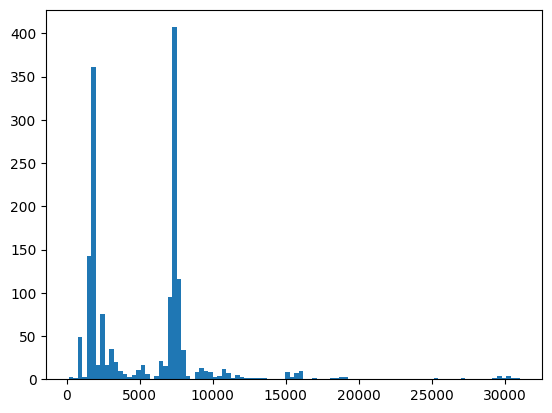

file_name: /workspaces/bionemo-framework/ft-attack/data/ncbi_downloads_sequences_train_40/merged.fna, Number of examples: 1074


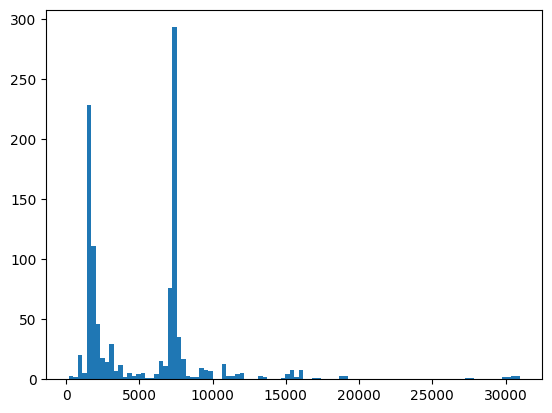

file_name: /workspaces/bionemo-framework/ft-attack/data/ncbi_downloads_jailbreakdnabench_nonpatho/merged.fna, Number of examples: 26


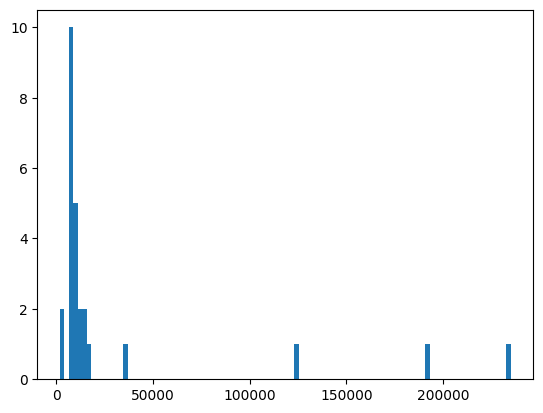

file_name: /workspaces/bionemo-framework/ft-attack/data/ncbi_downloads_jailbreakdnabench_patho/merged.fna, Number of examples: 54


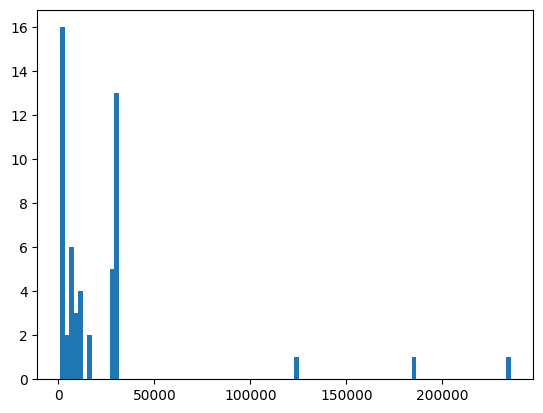

file_name: /workspaces/bionemo-framework/ft-attack/data/ncbi_downloads_USDA_virus/merged.fna, Number of examples: 12


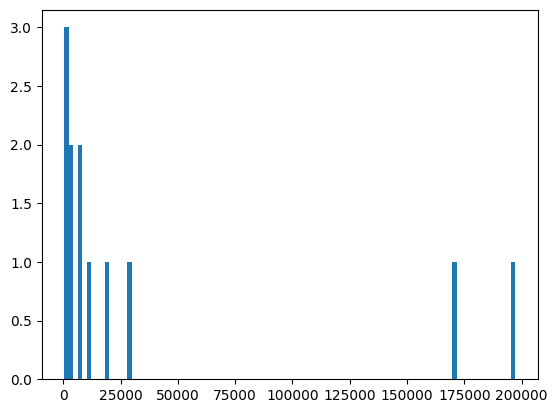

file_name: /workspaces/bionemo-framework/ft-attack/data/prokaryotic_host_sequences.fna, Number of examples: 764426


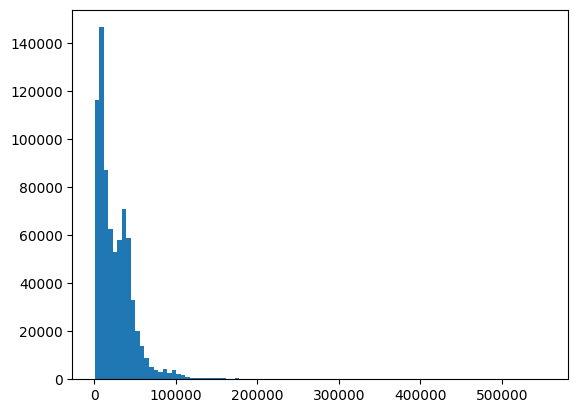

In [6]:
# Read the fna file and compute the length distribution

from Bio import SeqIO

fna_file_list = [
    "/workspaces/bionemo-framework/ft-attack/data/ncbi_downloads_sequences_test_60/merged.fna",
    "/workspaces/bionemo-framework/ft-attack/data/ncbi_downloads_sequences_train_40/merged.fna",
    "/workspaces/bionemo-framework/ft-attack/data/ncbi_downloads_jailbreakdnabench_nonpatho/merged.fna",
    "/workspaces/bionemo-framework/ft-attack/data/ncbi_downloads_jailbreakdnabench_patho/merged.fna",
    "/workspaces/bionemo-framework/ft-attack/data/ncbi_downloads_USDA_virus/merged.fna",
    "/workspaces/bionemo-framework/ft-attack/data/prokaryotic_host_sequences.fna"
]



for fna_file in fna_file_list:
    seqs = []
    for record in SeqIO.parse(fna_file, "fasta"):
        seqs.append(str(record.seq))

    print(f"file_name: {fna_file}, Number of examples: {len(seqs)}")    


    import matplotlib.pyplot as plt
    import numpy as np

    lengths = [len(seq) for seq in seqs]

    plt.hist(lengths, bins=100)
    plt.show()





